The dataset comprises approximately 18000 data entries containing characteristics of the asteroid. Out of which train set comprises 12600 samples and 26 columns, while the test set comprises 5400 samples with 25 columns. You have to use the train set and test set to accurately predict the observational days required (named as 'data_arc' in the data). A brief description of the dataset is provided in the below section.

Columns

Column features are described in the following format -

Note: Numerical values refer to no specific unit and should be considered a number describing the particular feature of the asteroid.

ID - unique ID of the asteroid (the first column of the dataset); required for final submission

full_name - Contains the complete designation or name of celestial objects in the dataset, serving as a unique identifier.

sigma_e - standard deviation of the eccentricity observed over previous years (numerical value)

sigma_a - standard deviation of the semi-major axis observed over previous years (numerical value)

sigma_i - standard deviation of the inclination observed over previous years (numerical value)

sigma_om - standard deviation of the longitude of ascending node observed over previous years (numerical value)

sigma_w - standard deviation of the argument of perihelion observed over previous years (numerical value)

sigma_ma - standard deviation of the mean anomaly observed over previous years (numerical value)

sigma_ad - standard deviation of the Aphelion distance observed over previous years (numerical value)

sigma_n - standard deviation of the count of observations used over previous years (numerical value)

sigma_tp - standard deviation of the time of perihelion passage observed over previous years (numerical value)

sigma_per - standard deviation of the sidereal orbital period observed over previous years (numerical value)

a - Semi-major axis (au); Represents the size of the object's orbit around the Sun in astronomical units (au).

e - Eccentricity(numerical value); Indicates how elliptical or circular the object's orbit is, with values close to 1 indicating high eccentricity.

i - Inclination (degrees); Angle describing the tilt of the object's orbit relative to the solar system's plane.

om - Longitude of the ascending node(degrees); Specifies the position of the object's orbital ascending node.

w - Argument of perihelion(numerical value); Defines the angle between perihelion and the ascending node.

ad - Aphelion distance (au); Farthest distance between the object and the Sun during its orbit, measured in astronomical units.

q - Perihelion distance (au); Closest distance between the object and the Sun during its orbit, measured in astronomical units.

per_y - Orbital period (year); Time taken for the object to complete one orbit around the Sun, measured in years.

n_obs_used - Number of observations used(numerical value); Number of observational data points used to calculate the object's orbital parameters.

ma - mean anomaly (degrees); fraction of an elliptical orbit's period that has elapsed since the orbiting body passed periapsis.

condition_code - Orbit condition code (numerical value); Code indicating the quality and reliability of the object's orbital data.

H - Absolute Magnitude parameter (numerical value); Measure of the object's intrinsic brightness or reflectivity, indicating its size and composition.

epoch_mjd - epoch of osculation in modified Julian Day Form(numerical value); the instant of time at which the position and velocity vectors were used to calculate the characteristics.

Output (Target label)

data_arc - Data arc-span (days); Duration over which observational data has been collected for the object, measured in days.

In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\ritti\Downloads\ML_Datasets\datapunk_train.csv")

In [2]:
df.head()

,ID,full_name,sigma_e,sigma_a,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,...,w,ad,q,per_y,n_obs_used,ma,condition_code,H,epoch_mjd,data_arc
0,11674,(2013 OV4),5.756300e-08,1.605300e-08,0.000010,0.000030,0.000035,0.000017,2.254200e-08,2.054500e-09,...,323.057654,3.736782,1.585411,4.341093,117,129.101981,0.0,17.590,60200,8139.0
1,10222,(2011 QH117),3.958900e-06,4.475300e-07,0.000021,0.000217,0.002209,0.001641,5.622000e-07,9.165300e-08,...,322.595505,2.769871,1.639917,3.274085,18,255.757258,2.0,19.900,60200,3722.0
2,15475,(2016 AQ193),7.510200e-01,1.280000e+00,15.770000,4.632200,13.312000,90.643000,1.548700e+00,3.309800e-01,...,292.517373,2.430256,1.586762,2.846550,6,56.485758,9.0,20.288,57391,1.0
3,11743,(2013 PB88),1.572900e-07,1.930200e-07,0.000027,0.000016,0.000186,0.000228,2.654700e-07,2.684700e-08,...,272.252762,3.540067,1.607843,4.129615,34,109.396437,1.0,18.320,60200,3515.0
4,3226,380393 (2002 XL63),5.860500e-08,1.539100e-08,0.000007,0.000063,0.000064,0.000014,2.074800e-08,2.621900e-09,...,233.395947,3.199585,1.547266,3.656550,227,265.069228,0.0,17.920,60200,7507.0


In [3]:
df.shape

(12600, 26)

In [4]:
df.isnull().sum()

ID                  0
full_name           0
sigma_e           103
sigma_a           103
sigma_i           103
sigma_om          103
sigma_w           103
sigma_ma          103
sigma_ad          103
sigma_n           103
sigma_tp          103
sigma_per         103
a                   0
e                   0
i                   0
om                  0
w                   0
ad                  0
q                   0
per_y               0
n_obs_used          0
ma                  0
condition_code      0
H                  85
epoch_mjd           0
data_arc            0
dtype: int64

In [5]:
df.drop(columns=['ID','full_name'],inplace=True)

In [6]:
df.head()

,sigma_e,sigma_a,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,...,w,ad,q,per_y,n_obs_used,ma,condition_code,H,epoch_mjd,data_arc
0,5.756300e-08,1.605300e-08,0.000010,0.000030,0.000035,0.000017,2.254200e-08,2.054500e-09,0.000069,0.000014,...,323.057654,3.736782,1.585411,4.341093,117,129.101981,0.0,17.590,60200,8139.0
1,3.958900e-06,4.475300e-07,0.000021,0.000217,0.002209,0.001641,5.622000e-07,9.165300e-08,0.005551,0.000364,...,322.595505,2.769871,1.639917,3.274085,18,255.757258,2.0,19.900,60200,3722.0
2,7.510200e-01,1.280000e+00,15.770000,4.632200,13.312000,90.643000,1.548700e+00,3.309800e-01,108.300000,993.850000,...,292.517373,2.430256,1.586762,2.846550,6,56.485758,9.0,20.288,57391,1.0
3,1.572900e-07,1.930200e-07,0.000027,0.000016,0.000186,0.000228,2.654700e-07,2.684700e-08,0.000905,0.000170,...,272.252762,3.540067,1.607843,4.129615,34,109.396437,1.0,18.320,60200,3515.0
4,5.860500e-08,1.539100e-08,0.000007,0.000063,0.000064,0.000014,2.074800e-08,2.621900e-09,0.000053,0.000013,...,233.395947,3.199585,1.547266,3.656550,227,265.069228,0.0,17.920,60200,7507.0


In [7]:
print(df.dtypes)


sigma_e           float64
sigma_a           float64
sigma_i           float64
sigma_om          float64
sigma_w           float64
sigma_ma          float64
sigma_ad          float64
sigma_n           float64
sigma_tp          float64
sigma_per         float64
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
ad                float64
q                 float64
per_y             float64
n_obs_used          int64
ma                float64
condition_code    float64
H                 float64
epoch_mjd           int64
data_arc          float64
dtype: object


In [8]:
na_cols=['sigma_e','sigma_a','sigma_i','sigma_om','sigma_w','sigma_ma','sigma_ad','sigma_n','sigma_tp','sigma_per','H']

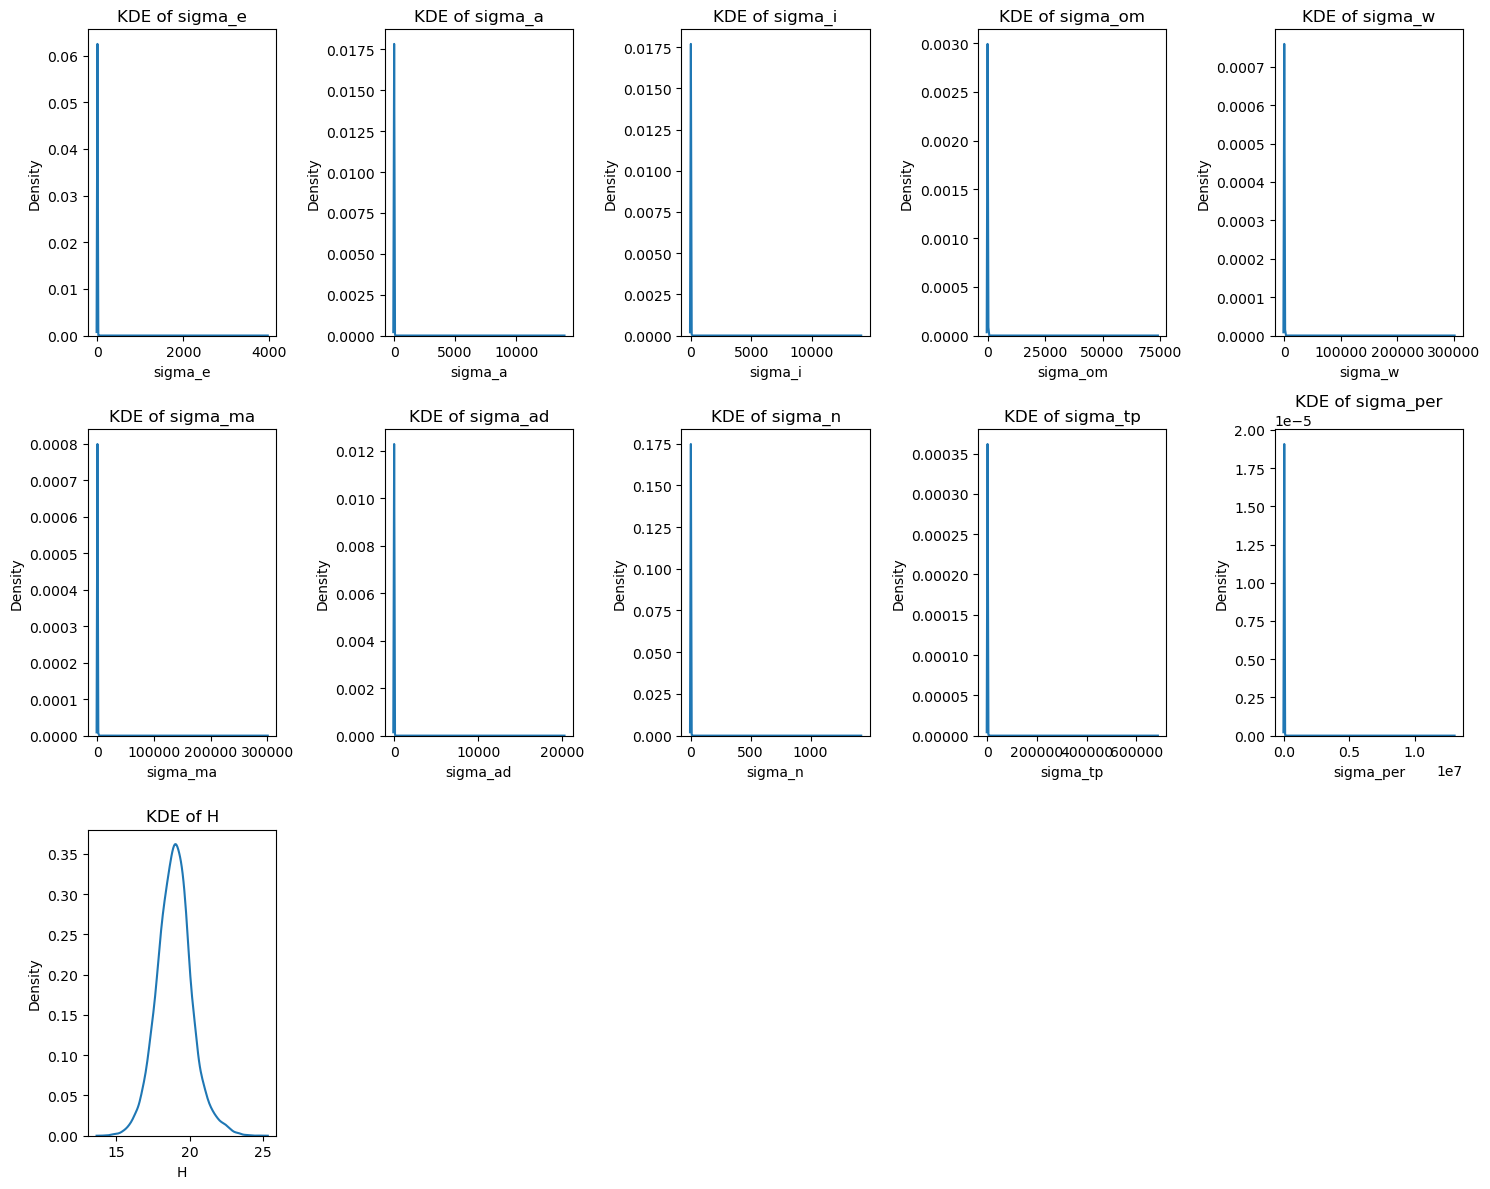

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 5 
n_rows = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier iteration

# Plot each KDE
for i, col in enumerate(na_cols):
    sns.kdeplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'KDE of {col}')  # Add title for clarity

# Remove any unused subplots
for j in range(len(na_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [10]:
df[na_cols]=df[na_cols].fillna(df[na_cols].mean())

In [11]:
df.isnull().sum()

sigma_e           0
sigma_a           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
a                 0
e                 0
i                 0
om                0
w                 0
ad                0
q                 0
per_y             0
n_obs_used        0
ma                0
condition_code    0
H                 0
epoch_mjd         0
data_arc          0
dtype: int64

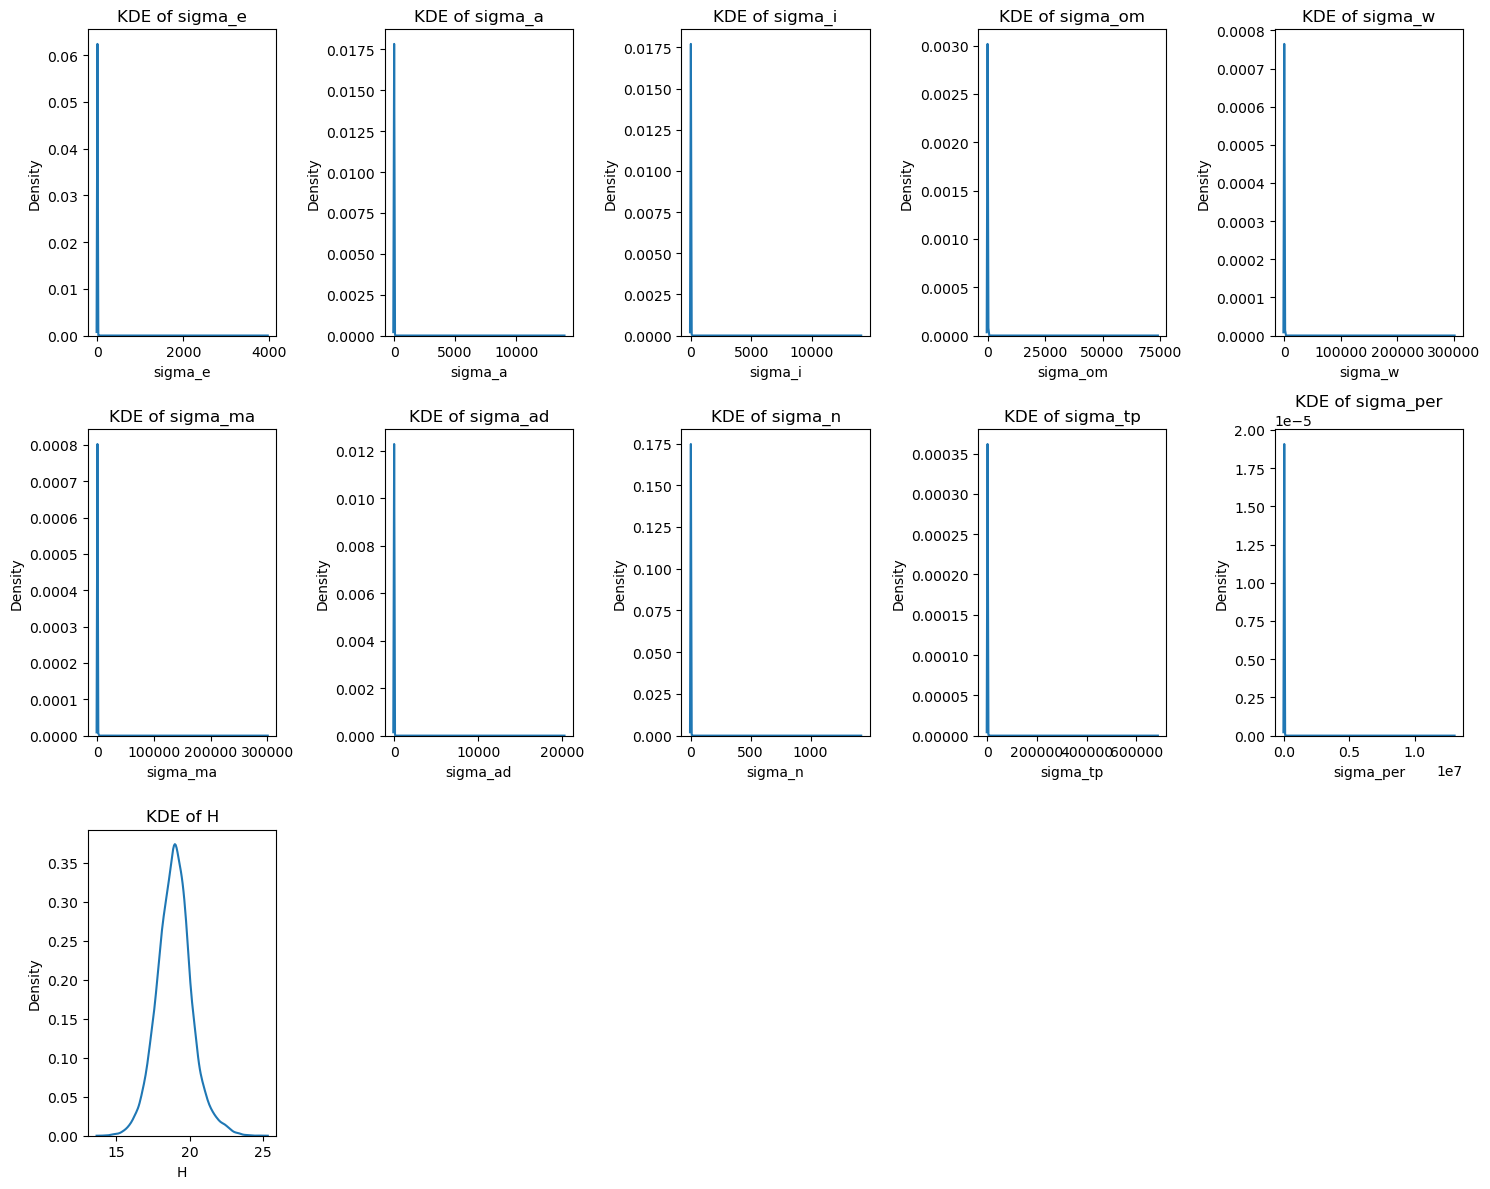

In [12]:
n_cols = 5 
n_rows = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  
axes = axes.flatten()
for i, col in enumerate(na_cols):
    sns.kdeplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'KDE of {col}')  
for j in range(len(na_cols), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [13]:
#filling na with mean should not distort the distribution

In [14]:
df.shape

(12600, 24)

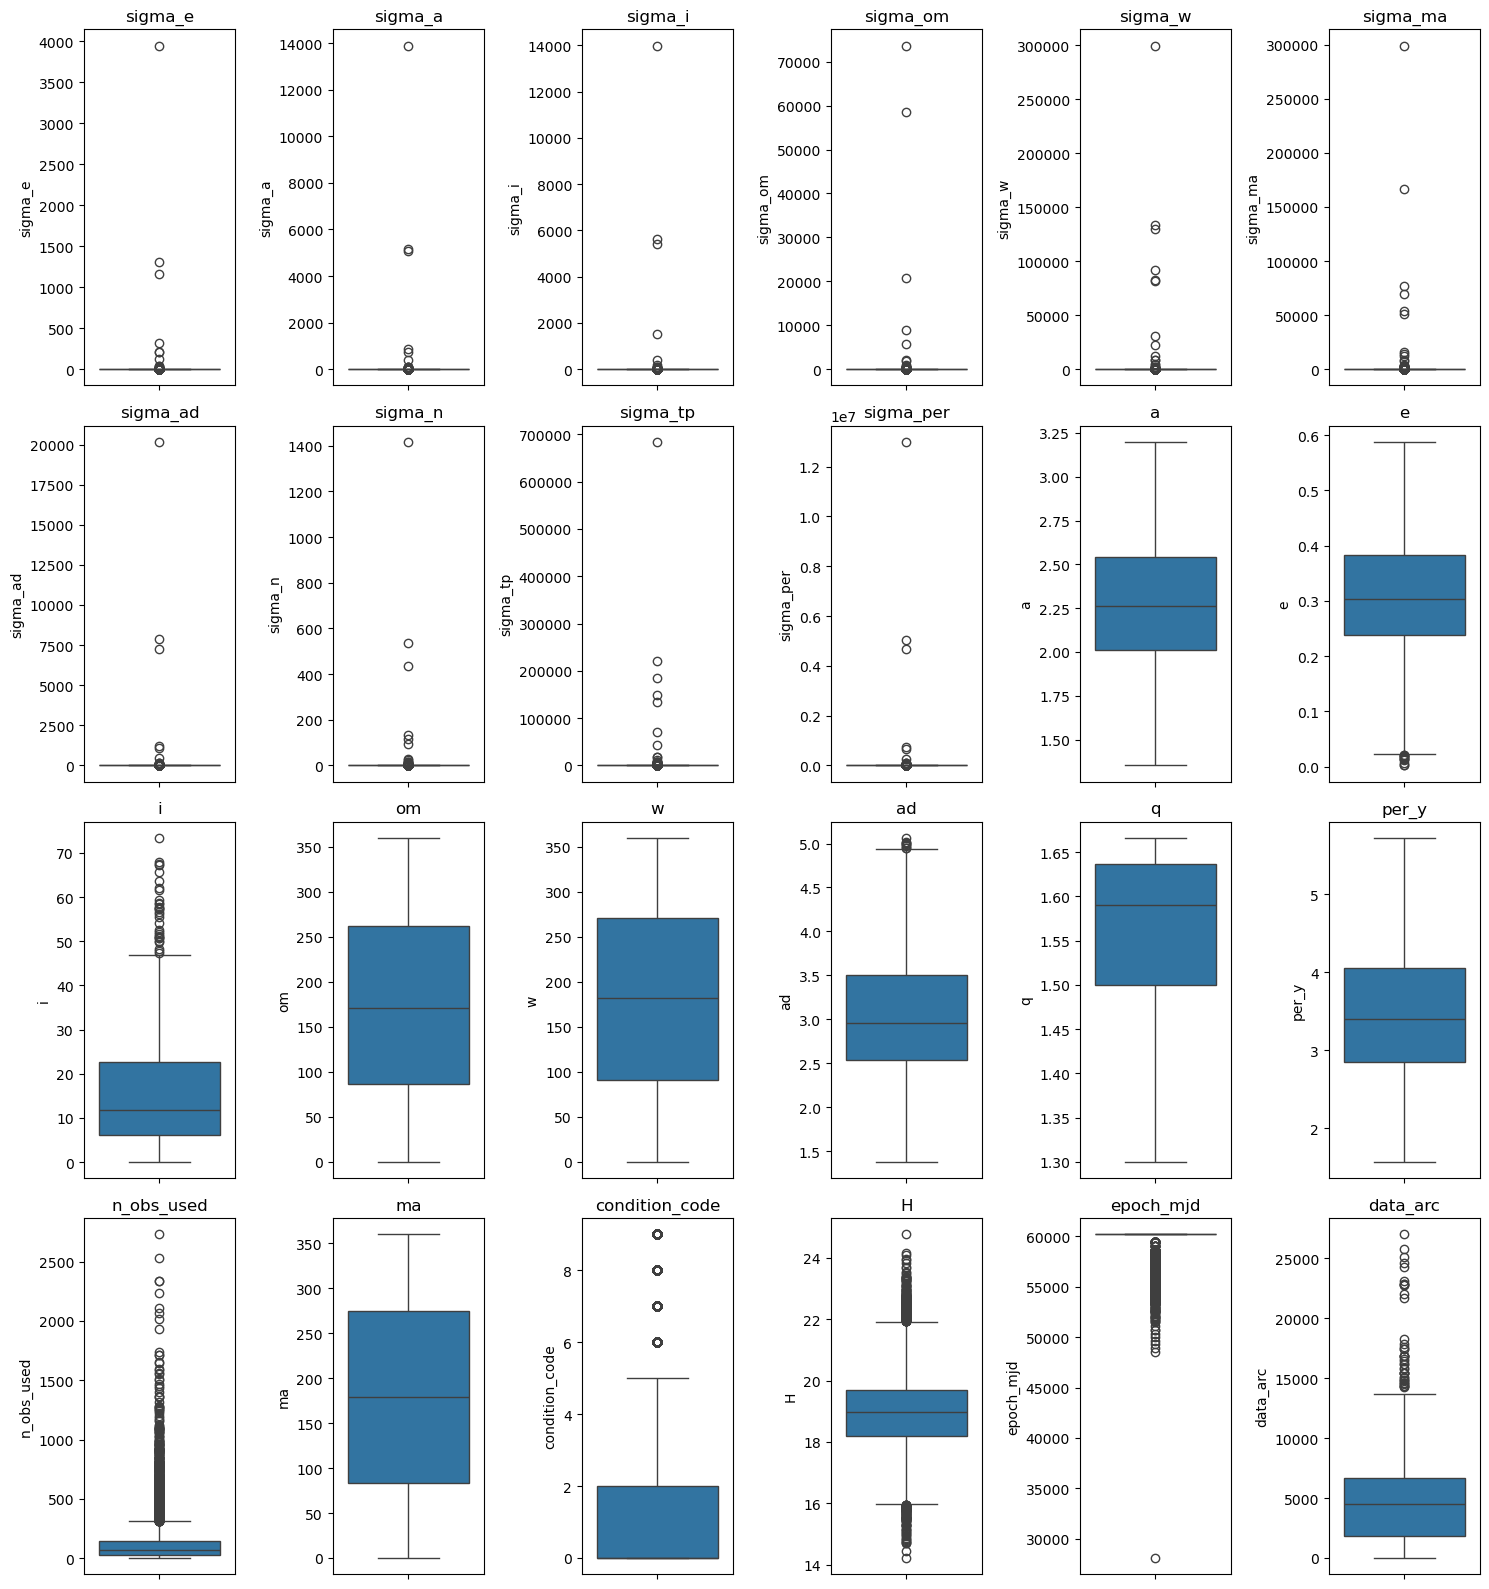

In [15]:
n_cols = 6 
n_rows = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col}')  
for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# a (semi-major axis), e (eccentricity), i (inclination)

    These are orbital characteristics of asteroids.
    Real-world variability: Asteroids naturally have diverse orbits. Some may have extreme values, leading to valid outliers.
    e close to 1 indicates high eccentricity, suggesting elongated orbits.

# High values in sigma_ (standard deviation columns)* may reflect genuine measurement uncertainties.
# ad (Aphelion distance), q (Perihelion distance)
    These describe distance parameters in the asteroid's orbit.
    Extreme distances could be due to highly eccentric orbits.

# per_y (orbital period)
    Orbital period depends on the semi-major axis and eccentricity.
    Large orbital periods correspond to asteroids far from the Sun.

# n_obs_used (number of observations)
    Some asteroids have been observed extensively over time, while others have limited data points.
# condition_code
    Represents the reliability of orbital data. Higher condition codes (outliers) indicate lower confidence or precision.
# H (absolute magnitude)
    This measures an asteroid's brightness and size.
    Outliers occur for very large or highly reflective asteroids.
# epoch_mjd
    Represents the observation time in Modified Julian Days. Some asteroids might have been observed for much longer spans.
# data_arc (target column)
    Indicates the duration of observation.
    Longer data_arc suggests some asteroids have been observed for decades, leading to valid outliers.

outliers often represent valid physical variability rather than noise or error, so avoid Capping

In [16]:
df.corr()

,sigma_e,sigma_a,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,...,w,ad,q,per_y,n_obs_used,ma,condition_code,H,epoch_mjd,data_arc
sigma_e,1.000000,0.994594,0.588917,0.937047,0.886037,0.720968,0.993410,0.995709,0.472929,0.993623,...,-0.008960,0.025719,0.002088,0.028048,-0.011342,0.010578,0.040344,-0.005505,-0.066884,-0.001249
sigma_a,0.994594,1.000000,0.644204,0.941738,0.863810,0.751386,0.999846,0.996009,0.511308,0.999896,...,-0.007467,0.028369,0.002701,0.030923,-0.011174,0.009544,0.039730,-0.008645,-0.065000,-0.001145
sigma_i,0.588917,0.644204,1.000000,0.511769,0.596878,0.937056,0.654821,0.606917,0.941900,0.652019,...,0.008519,0.030717,-0.003694,0.032743,-0.011724,0.006675,0.041899,-0.015770,-0.059671,-0.002119
sigma_om,0.937047,0.941738,0.511769,1.000000,0.801906,0.656583,0.938909,0.946250,0.400816,0.939777,...,-0.012560,0.026987,0.004003,0.029607,-0.012053,0.005949,0.042939,-0.006698,-0.068115,-0.001725
sigma_w,0.886037,0.863810,0.596878,0.801906,1.000000,0.729531,0.860848,0.885718,0.581285,0.860513,...,-0.005762,0.017045,-0.002388,0.018506,-0.015813,0.006733,0.056403,0.010035,-0.087049,-0.002681
sigma_ma,0.720968,0.751386,0.937056,0.656583,0.729531,1.000000,0.759701,0.727359,0.943297,0.757464,...,0.000743,0.025988,-0.004538,0.028045,-0.014529,0.009134,0.051957,-0.011261,-0.078835,-0.003279
sigma_ad,0.993410,0.999846,0.654821,0.938909,0.860848,0.759701,1.000000,0.994546,0.521761,0.999986,...,-0.007240,0.028729,0.002555,0.031287,-0.011107,0.009815,0.039480,-0.009084,-0.064604,-0.001027
sigma_n,0.995709,0.996009,0.606917,0.946250,0.885718,0.727359,0.994546,1.000000,0.484270,0.994717,...,-0.008576,0.026063,0.002339,0.028491,-0.012208,0.008070,0.043552,-0.005472,-0.070525,-0.002302
sigma_tp,0.472929,0.511308,0.941900,0.400816,0.581285,0.943297,0.521761,0.484270,1.000000,0.518735,...,0.007227,0.021706,-0.007243,0.023099,-0.013825,0.006127,0.049511,-0.008609,-0.071595,-0.003296
sigma_per,0.993623,0.999896,0.652019,0.939777,0.860513,0.757464,0.999986,0.994717,0.518735,1.000000,...,-0.007267,0.028645,0.002677,0.031214,-0.011069,0.009744,0.039343,-0.009110,-0.064433,-0.001019


In [17]:
df[['sigma_e','sigma_a','sigma_i','sigma_om','sigma_w','sigma_ma','sigma_ad','sigma_n','sigma_tp','sigma_per']].corr()

,sigma_e,sigma_a,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per
sigma_e,1.000000,0.994594,0.588917,0.937047,0.886037,0.720968,0.993410,0.995709,0.472929,0.993623
sigma_a,0.994594,1.000000,0.644204,0.941738,0.863810,0.751386,0.999846,0.996009,0.511308,0.999896
sigma_i,0.588917,0.644204,1.000000,0.511769,0.596878,0.937056,0.654821,0.606917,0.941900,0.652019
sigma_om,0.937047,0.941738,0.511769,1.000000,0.801906,0.656583,0.938909,0.946250,0.400816,0.939777
sigma_w,0.886037,0.863810,0.596878,0.801906,1.000000,0.729531,0.860848,0.885718,0.581285,0.860513
sigma_ma,0.720968,0.751386,0.937056,0.656583,0.729531,1.000000,0.759701,0.727359,0.943297,0.757464
sigma_ad,0.993410,0.999846,0.654821,0.938909,0.860848,0.759701,1.000000,0.994546,0.521761,0.999986
sigma_n,0.995709,0.996009,0.606917,0.946250,0.885718,0.727359,0.994546,1.000000,0.484270,0.994717
sigma_tp,0.472929,0.511308,0.941900,0.400816,0.581285,0.943297,0.521761,0.484270,1.000000,0.518735
sigma_per,0.993623,0.999896,0.652019,0.939777,0.860513,0.757464,0.999986,0.994717,0.518735,1.000000


# Highly correlated
sigma_e, sigma_a, sigma_ad, sigma_n, sigma_per

drop correlated cols or club them using PCA to make two columns

In [18]:
df.tail()

,sigma_e,sigma_a,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,...,w,ad,q,per_y,n_obs_used,ma,condition_code,H,epoch_mjd,data_arc
12595,8.810900e-08,5.207500e-08,0.000006,0.000053,0.000056,0.000035,7.625300e-08,7.172400e-09,0.000167,0.000046,...,143.400331,3.783855,1.384270,4.153965,188,200.206236,0.0,17.89,60200,4885.0
12596,7.918700e-08,2.484900e-08,0.000006,0.000097,0.000099,0.000029,3.072900e-08,5.267000e-09,0.000092,0.000020,...,37.735940,2.689410,1.660131,3.207217,120,39.192294,0.0,18.38,60200,7946.0
12597,2.572000e-05,1.160900e-04,0.000336,0.000137,0.000866,0.087850,1.628800e-04,2.451200e-05,0.278190,0.093868,...,354.596025,3.056142,1.300093,3.214623,82,31.968761,5.0,21.30,60200,83.0
12598,9.955400e-08,2.129600e-08,0.000010,0.000036,0.000041,0.000026,2.669700e-08,4.613600e-09,0.000075,0.000017,...,14.399328,2.702626,1.609107,3.165490,137,178.033199,0.0,17.95,60200,4892.0
12599,9.657300e-08,5.481900e-08,0.000009,0.000031,0.000044,0.000017,7.192400e-08,1.024400e-08,0.000060,0.000045,...,105.095085,3.000801,1.573539,3.459043,143,297.302108,0.0,18.32,60200,3659.0


In [19]:
df.shape

(12600, 24)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(['data_arc'],axis=1),df['data_arc'],test_size=0.05,random_state=42)

In [21]:
X_train.head()

,sigma_e,sigma_a,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,...,om,w,ad,q,per_y,n_obs_used,ma,condition_code,H,epoch_mjd
101,7.296700e-08,1.905000e-08,0.000011,0.000017,0.000053,0.000056,2.141500e-08,5.700700e-09,0.000145,0.000014,...,303.754149,134.395625,2.129800,1.659268,2.607725,123,149.250533,0.0,18.98,60200
8923,4.674000e-07,3.242400e-07,0.000009,0.000071,0.000575,0.000487,4.205100e-07,6.285600e-08,0.001759,0.000267,...,43.410687,288.930539,2.923069,1.584675,3.383780,40,241.926358,1.0,19.70,60200
5216,5.401100e-07,1.781800e-08,0.000024,0.000060,0.001161,0.000611,2.309600e-08,3.533200e-09,0.002075,0.000015,...,355.356253,2.103048,2.895179,1.571917,3.338114,60,175.827576,1.0,19.85,60200
1039,4.409500e-08,7.063800e-09,0.000005,0.000026,0.000027,0.000006,9.411600e-09,1.162600e-09,0.000021,0.000006,...,186.958968,170.677821,3.206221,1.606567,3.733003,463,3.216093,0.0,17.20,60200
5756,4.779500e-08,9.883100e-09,0.000003,0.000128,0.000130,0.000017,1.311800e-08,1.889400e-09,0.000060,0.000008,...,240.517578,34.537390,3.008339,1.524544,3.412125,193,349.118355,0.0,18.51,60200


In [22]:
print(X_train.shape,X_test.shape)

(11970, 23) (630, 23)


In [23]:
y_train.head()

101     4149.0
8923    2687.0
5216    3717.0
1039    5564.0
5756    7128.0
Name: data_arc, dtype: float64

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data=scaler.fit(X_train)

In [25]:
# from sklearn.preprocessing import RobustScaler
# scaler=RobustScaler()
# scaled_data=scaler.fit(X_train)

In [26]:
X_train_scaled=scaled_data.transform(X_train)
X_test_scaled=scaled_data.transform(X_test)

In [27]:
X_train_scaled

array([[-1.62826802e-02, -1.60406258e-02, -1.67774295e-02, ...,
        -5.96673484e-01,  1.01515288e-02,  2.78815584e-01],
       [-1.62826702e-02, -1.60406236e-02, -1.67774470e-02, ...,
        -2.48613952e-01,  6.08751102e-01,  2.78815584e-01],
       [-1.62826684e-02, -1.60406258e-02, -1.67773423e-02, ...,
        -2.48613952e-01,  7.33459347e-01,  2.78815584e-01],
       ...,
       [ 3.29846440e+01,  3.51987067e+01,  1.02177617e+01, ...,
         2.53586231e+00, -7.33109608e-01, -3.62384065e+00],
       [-1.62826811e-02, -1.60406258e-02, -1.67774622e-02, ...,
        -5.96673484e-01, -6.71586875e-01,  2.78815584e-01],
       [-1.62826799e-02, -1.60406258e-02, -1.67774741e-02, ...,
        -5.96673484e-01,  9.24678655e-01,  2.78815584e-01]])

In [28]:
X_train.columns

Index(['sigma_e', 'sigma_a', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma',
       'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'a', 'e', 'i', 'om',
       'w', 'ad', 'q', 'per_y', 'n_obs_used', 'ma', 'condition_code', 'H',
       'epoch_mjd'],
      dtype='object')

In [29]:
X_train=pd.DataFrame(data=X_train_scaled,columns=X_train.columns)
X_test=pd.DataFrame(data=X_test_scaled,columns=X_train.columns)

In [30]:
X_train

,sigma_e,sigma_a,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,...,om,w,ad,q,per_y,n_obs_used,ma,condition_code,H,epoch_mjd
0,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.017510,-0.019925,-0.015892,...,1.238850,-0.457719,-1.289586,1.037379,-1.141320,0.011759,-0.277785,-0.596673,0.010152,0.278816
1,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.017510,-0.019925,-0.015892,...,-1.266734,1.062348,-0.092288,0.279538,-0.086943,-0.497904,0.574130,-0.248614,0.608751,0.278816
2,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.017510,-0.019925,-0.015892,...,1.735477,-1.759002,-0.134383,0.149920,-0.148986,-0.375094,-0.033478,-0.248614,0.733459,0.278816
3,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.017510,-0.019925,-0.015892,...,0.114796,-0.100833,0.335081,0.501952,0.387526,2.099537,-1.620195,-0.596673,-1.469720,0.278816
4,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.017510,-0.019925,-0.015892,...,0.630252,-1.439965,0.036412,-0.331386,-0.048432,0.441596,1.559483,-0.596673,-0.380601,0.278816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11965,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.017510,-0.019925,-0.015892,...,0.307838,-0.330316,1.089539,-0.234463,1.077883,-0.368953,-0.998271,-0.248614,0.126546,0.278816
11966,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.017510,-0.019925,-0.015892,...,-0.552704,0.382777,1.045336,1.021391,1.234160,0.073165,1.328714,-0.596673,-1.029084,0.278816
11967,32.984644,35.198707,10.217762,65.958648,26.020651,22.930701,34.583287,36.841882,9.989832,34.824285,...,-0.259106,-1.549922,1.699852,0.750924,1.924295,-0.718963,-1.409361,2.535862,-0.733110,-3.623841
11968,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.017510,-0.019925,-0.015892,...,-0.575519,1.075928,-1.253104,0.576902,-1.170946,1.190740,-1.042924,-0.596673,-0.671587,0.278816


In [31]:
# df1=X_train[['sigma_e','sigma_a','sigma_ad','sigma_n','sigma_per']]
df1=X_train[['sigma_e','sigma_a','sigma_i','sigma_om','sigma_w','sigma_ma','sigma_ad','sigma_n','sigma_tp','sigma_per']]
df1

,sigma_e,sigma_a,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per
0,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.017510,-0.019925,-0.015892
1,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.017510,-0.019925,-0.015892
2,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.017510,-0.019925,-0.015892
3,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.017510,-0.019925,-0.015892
4,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.017510,-0.019925,-0.015892
...,...,...,...,...,...,...,...,...,...,...
11965,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.017510,-0.019925,-0.015892
11966,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.017510,-0.019925,-0.015892
11967,32.984644,35.198707,10.217762,65.958648,26.020651,22.930701,34.583287,36.841882,9.989832,34.824285
11968,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.017510,-0.019925,-0.015892


In [32]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit(df1.values)
X_train_pca=pca.transform(df1.values)

In [33]:
X_train_pca

array([[-5.60577097e-02, -8.57983604e-03, -6.43818252e-03],
       [-5.60575485e-02, -8.57968426e-03, -6.43803240e-03],
       [-5.60574527e-02, -8.57959606e-03, -6.43790496e-03],
       ...,
       [ 1.00618520e+02, -2.87427279e+01, -9.13550907e+00],
       [-5.60577310e-02, -8.57986028e-03, -6.43818001e-03],
       [-5.60577071e-02, -8.57988586e-03, -6.43817712e-03]])

In [34]:
df1_updated=pd.DataFrame(data=X_train_pca,columns=['c1','c2','c3'])

In [35]:
df1_updated

,c1,c2,c3
0,-0.056058,-0.008580,-0.006438
1,-0.056058,-0.008580,-0.006438
2,-0.056057,-0.008580,-0.006438
3,-0.056058,-0.008580,-0.006438
4,-0.056058,-0.008580,-0.006438
...,...,...,...
11965,-0.056057,-0.008580,-0.006438
11966,-0.056058,-0.008580,-0.006438
11967,100.618520,-28.742728,-9.135509
11968,-0.056058,-0.008580,-0.006438


In [36]:
X_train.drop(columns=['sigma_e','sigma_a','sigma_i','sigma_om','sigma_w','sigma_ma','sigma_ad','sigma_n','sigma_tp','sigma_per'],inplace=True)

In [37]:
X_train

,a,e,i,om,w,ad,q,per_y,n_obs_used,ma,condition_code,H,epoch_mjd
0,-1.161824,-1.563177,0.409094,1.238850,-0.457719,-1.289586,1.037379,-1.141320,0.011759,-0.277785,-0.596673,0.010152,0.278816
1,-0.051938,-0.024009,-0.751275,-1.266734,1.062348,-0.092288,0.279538,-0.086943,-0.497904,0.574130,-0.248614,0.608751,0.278816
2,-0.114713,-0.030120,-0.787152,1.735477,-1.759002,-0.134383,0.149920,-0.148986,-0.375094,-0.033478,-0.248614,0.733459,0.278816
3,0.419156,0.292026,-0.808668,0.114796,-0.100833,0.335081,0.501952,0.387526,2.099537,-1.620195,-0.596673,-1.469720,0.278816
4,-0.013116,0.247155,-1.217802,0.630252,-1.439965,0.036412,-0.331386,-0.048432,0.441596,1.559483,-0.596673,-0.380601,0.278816
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11965,1.079182,1.023748,-0.964668,0.307838,-0.330316,1.089539,-0.234463,1.077883,-0.368953,-0.998271,-0.248614,0.126546,0.278816
11966,1.224851,0.703036,-0.805093,-0.552704,0.382777,1.045336,1.021391,1.234160,0.073165,1.328714,-0.596673,-1.029084,0.278816
11967,1.853442,1.178278,-0.896022,-0.259106,-1.549922,1.699852,0.750924,1.924295,-0.718963,-1.409361,2.535862,-0.733110,-3.623841
11968,-1.194490,-1.392614,1.152857,-0.575519,1.075928,-1.253104,0.576902,-1.170946,1.190740,-1.042924,-0.596673,-0.671587,0.278816


In [38]:
X_train_new=pd.concat([df1_updated,X_train],axis=1)

In [39]:
X_train_new

,c1,c2,c3,a,e,i,om,w,ad,q,per_y,n_obs_used,ma,condition_code,H,epoch_mjd
0,-0.056058,-0.008580,-0.006438,-1.161824,-1.563177,0.409094,1.238850,-0.457719,-1.289586,1.037379,-1.141320,0.011759,-0.277785,-0.596673,0.010152,0.278816
1,-0.056058,-0.008580,-0.006438,-0.051938,-0.024009,-0.751275,-1.266734,1.062348,-0.092288,0.279538,-0.086943,-0.497904,0.574130,-0.248614,0.608751,0.278816
2,-0.056057,-0.008580,-0.006438,-0.114713,-0.030120,-0.787152,1.735477,-1.759002,-0.134383,0.149920,-0.148986,-0.375094,-0.033478,-0.248614,0.733459,0.278816
3,-0.056058,-0.008580,-0.006438,0.419156,0.292026,-0.808668,0.114796,-0.100833,0.335081,0.501952,0.387526,2.099537,-1.620195,-0.596673,-1.469720,0.278816
4,-0.056058,-0.008580,-0.006438,-0.013116,0.247155,-1.217802,0.630252,-1.439965,0.036412,-0.331386,-0.048432,0.441596,1.559483,-0.596673,-0.380601,0.278816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11965,-0.056057,-0.008580,-0.006438,1.079182,1.023748,-0.964668,0.307838,-0.330316,1.089539,-0.234463,1.077883,-0.368953,-0.998271,-0.248614,0.126546,0.278816
11966,-0.056058,-0.008580,-0.006438,1.224851,0.703036,-0.805093,-0.552704,0.382777,1.045336,1.021391,1.234160,0.073165,1.328714,-0.596673,-1.029084,0.278816
11967,100.618520,-28.742728,-9.135509,1.853442,1.178278,-0.896022,-0.259106,-1.549922,1.699852,0.750924,1.924295,-0.718963,-1.409361,2.535862,-0.733110,-3.623841
11968,-0.056058,-0.008580,-0.006438,-1.194490,-1.392614,1.152857,-0.575519,1.075928,-1.253104,0.576902,-1.170946,1.190740,-1.042924,-0.596673,-0.671587,0.278816


In [40]:
X_test

,sigma_e,sigma_a,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,...,om,w,ad,q,per_y,n_obs_used,ma,condition_code,H,epoch_mjd
0,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.01751,-0.019925,-0.015892,...,-0.935335,-1.258202,-1.434101,1.059816,-1.271702,-0.448780,0.340791,-0.596673,0.459101,0.278816
1,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.01751,-0.019925,-0.015892,...,-0.647950,0.143273,-0.961416,0.315453,-0.934054,0.398612,0.828141,-0.596673,-1.112223,0.278816
2,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.01751,-0.019925,-0.015892,...,-1.172012,1.693928,-1.507770,0.225165,-1.451487,-0.264564,0.867598,-0.596673,0.533926,0.278816
3,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.01751,-0.019925,-0.015892,...,0.489005,0.723740,0.455735,0.739073,0.551653,-0.252283,1.133649,-0.596673,-0.846178,0.278816
4,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.01751,-0.019925,-0.015892,...,-0.278699,0.258764,-0.219726,0.280283,-0.215393,-0.252283,0.478798,-0.596673,0.442473,0.278816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020947,-0.015946,-0.01751,-0.019924,-0.015892,...,-1.254956,0.855325,-1.394689,0.961212,-1.248951,-0.614574,-1.533393,-0.248614,0.101604,0.278816
626,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.01751,-0.019925,-0.015892,...,1.561794,1.504335,0.227495,-0.499230,0.121462,-0.497904,-0.660185,-0.248614,1.273862,0.278816
627,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.01751,-0.019925,-0.015892,...,-0.372511,1.231715,-0.026128,0.860153,0.068404,-0.197018,-1.186253,-0.596673,-0.688215,0.278816
628,-0.016283,-0.016041,-0.016777,-0.017322,-0.022758,-0.020948,-0.015946,-0.01751,-0.019925,-0.015892,...,0.771854,-0.729357,2.833791,-1.708727,2.822640,-0.602293,-1.116428,-0.248614,0.617065,0.278816


In [41]:
df2=X_test[['sigma_e','sigma_a','sigma_i','sigma_om','sigma_w','sigma_ma','sigma_ad','sigma_n','sigma_tp','sigma_per']]
from sklearn.decomposition import PCA
pca_test=PCA(n_components=3)
pca_test.fit(df2.values)
X_test_pca=pca_test.transform(df2.values)
df2_updated=pd.DataFrame(data=X_test_pca,columns=['c1','c2','c3'])
X_test.drop(columns=['sigma_e','sigma_a','sigma_i','sigma_om','sigma_w','sigma_ma','sigma_ad','sigma_n','sigma_tp','sigma_per'],inplace=True)
X_test_new=pd.concat([df2_updated,X_test],axis=1)

In [42]:
X_test_new

,c1,c2,c3,a,e,i,om,w,ad,q,per_y,n_obs_used,ma,condition_code,H,epoch_mjd
0,-0.005691,-0.001964,-0.000587,-1.306281,-1.771367,0.804976,-0.935335,-1.258202,-1.434101,1.059816,-1.271702,-0.448780,0.340791,-0.596673,0.459101,0.278816
1,-0.005692,-0.001965,-0.000587,-0.935775,-0.951122,1.133137,-0.647950,0.143273,-0.961416,0.315453,-0.934054,0.398612,0.828141,-0.596673,-1.112223,0.278816
2,-0.005692,-0.001965,-0.000587,-1.508532,-1.655008,0.864880,-1.172012,1.693928,-1.507770,0.225165,-1.451487,-0.264564,0.867598,-0.596673,0.533926,0.278816
3,-0.005691,-0.001965,-0.000587,0.578653,0.332397,0.590330,0.489005,0.723740,0.455735,0.739073,0.551653,-0.252283,1.133649,-0.596673,-0.846178,0.278816
4,-0.005692,-0.001964,-0.000587,-0.182220,-0.143792,-1.124918,-0.278699,0.258764,-0.219726,0.280283,-0.215393,-0.252283,0.478798,-0.596673,0.442473,0.278816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,-0.005691,-0.001964,-0.000588,-1.280943,-1.689354,0.853937,-1.254956,0.855325,-1.394689,0.961212,-1.248951,-0.614574,-1.533393,-0.248614,0.101604,0.278816
626,-0.005691,-0.001964,-0.000587,0.156889,0.452682,-0.905232,1.561794,1.504335,0.227495,-0.499230,0.121462,-0.497904,-0.660185,-0.248614,1.273862,0.278816
627,-0.005692,-0.001965,-0.000587,0.104014,-0.107723,0.977679,-0.372511,1.231715,-0.026128,0.860153,0.068404,-0.197018,-1.186253,-0.596673,-0.688215,0.278816
628,-0.005691,-0.001964,-0.000587,2.639813,2.280969,0.317735,0.771854,-0.729357,2.833791,-1.708727,2.822640,-0.602293,-1.116428,-0.248614,0.617065,0.278816


In [43]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
rf=RandomForestRegressor(n_estimators=100,max_depth=10)
GB=GradientBoostingRegressor(n_estimators=100)
AB=AdaBoostRegressor()

In [44]:
import xgboost as xg
xgb = xg.XGBRegressor(objective ='reg:linear',n_estimators = 15, seed = 200)

In [45]:
rf.fit(X_train_new,y_train)
GB.fit(X_train_new,y_train)
AB.fit(X_train_new,y_train)
xgb.fit(X_train_new,y_train)

c:\Users\ritti\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:37:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=15, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [46]:
X_test_new

,c1,c2,c3,a,e,i,om,w,ad,q,per_y,n_obs_used,ma,condition_code,H,epoch_mjd
0,-0.005691,-0.001964,-0.000587,-1.306281,-1.771367,0.804976,-0.935335,-1.258202,-1.434101,1.059816,-1.271702,-0.448780,0.340791,-0.596673,0.459101,0.278816
1,-0.005692,-0.001965,-0.000587,-0.935775,-0.951122,1.133137,-0.647950,0.143273,-0.961416,0.315453,-0.934054,0.398612,0.828141,-0.596673,-1.112223,0.278816
2,-0.005692,-0.001965,-0.000587,-1.508532,-1.655008,0.864880,-1.172012,1.693928,-1.507770,0.225165,-1.451487,-0.264564,0.867598,-0.596673,0.533926,0.278816
3,-0.005691,-0.001965,-0.000587,0.578653,0.332397,0.590330,0.489005,0.723740,0.455735,0.739073,0.551653,-0.252283,1.133649,-0.596673,-0.846178,0.278816
4,-0.005692,-0.001964,-0.000587,-0.182220,-0.143792,-1.124918,-0.278699,0.258764,-0.219726,0.280283,-0.215393,-0.252283,0.478798,-0.596673,0.442473,0.278816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,-0.005691,-0.001964,-0.000588,-1.280943,-1.689354,0.853937,-1.254956,0.855325,-1.394689,0.961212,-1.248951,-0.614574,-1.533393,-0.248614,0.101604,0.278816
626,-0.005691,-0.001964,-0.000587,0.156889,0.452682,-0.905232,1.561794,1.504335,0.227495,-0.499230,0.121462,-0.497904,-0.660185,-0.248614,1.273862,0.278816
627,-0.005692,-0.001965,-0.000587,0.104014,-0.107723,0.977679,-0.372511,1.231715,-0.026128,0.860153,0.068404,-0.197018,-1.186253,-0.596673,-0.688215,0.278816
628,-0.005691,-0.001964,-0.000587,2.639813,2.280969,0.317735,0.771854,-0.729357,2.833791,-1.708727,2.822640,-0.602293,-1.116428,-0.248614,0.617065,0.278816


In [47]:
y_pred=rf.predict(X_test_new)

In [48]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred,y_test)
mse

2415012.924316179

In [49]:
y_pred=xgb.predict(X_test_new)
mse=mean_squared_error(y_pred,y_test)
mse

2885999.384666191

In [50]:
y_pred=AB.predict(X_test_new)
mse=mean_squared_error(y_pred,y_test)
mse

4113241.6981496555

In [51]:
y_pred=GB.predict(X_test_new)
mse=mean_squared_error(y_pred,y_test)
mse

2134889.618952247